In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skit
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

bank_df=pd.read_csv("bank-full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
bank_df.info()
# As seen below there are no null values in dataset
# Many variables are object type. We need to convert these into int64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [23]:
#As seen below, there are no missing values (NA) in the dataset
print(bank_df.isnull().sum())
bank_df.isnull().values.any()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


False

In [24]:
bank_df.describe().T

# Balance variable contains negative values which should not be the case
# It is better to contact the data source to check the same

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [18]:
bank_df['job'].value_counts()

# As seen below there are job titles that are 'unknown'

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [116]:
# Method to encode the variables of string type to int 64 type
def encodeColumn(columnName):
    encoder=LabelEncoder()
    bank_df[columnName]=encoder.fit_transform(bank_df[columnName])
    keys = encoder.classes_
    values = encoder.transform(encoder.classes_)
    dictionary = dict(zip(keys, values))
    print('Encoded values for \'',columnName,'\' : \n',dictionary)

In [117]:
encodeColumn('job')
encodeColumn('marital')
encodeColumn('education')
encodeColumn('default')
encodeColumn('housing')
encodeColumn('loan')
encodeColumn('contact')
encodeColumn('month')
encodeColumn('poutcome')
encodeColumn('Target')

Encoded values for ' job ' : 
 {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
Encoded values for ' marital ' : 
 {'divorced': 0, 'married': 1, 'single': 2}
Encoded values for ' education ' : 
 {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
Encoded values for ' default ' : 
 {'no': 0, 'yes': 1}
Encoded values for ' housing ' : 
 {'no': 0, 'yes': 1}
Encoded values for ' loan ' : 
 {'no': 0, 'yes': 1}
Encoded values for ' contact ' : 
 {'cellular': 0, 'telephone': 1, 'unknown': 2}
Encoded values for ' month ' : 
 {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
Encoded values for ' poutcome ' : 
 {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}
Encoded values for ' Target ' : 
 {'no': 0, 'yes': 1}


In [27]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [56]:
bank_df.info()
print(bank_df['Target'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int32
marital      45211 non-null int32
education    45211 non-null int32
default      45211 non-null int32
balance      45211 non-null int64
housing      45211 non-null int32
loan         45211 non-null int32
contact      45211 non-null int32
day          45211 non-null int64
month        45211 non-null int32
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int32
Target       45211 non-null int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB
0    39922
1     5289
Name: Target, dtype: int64


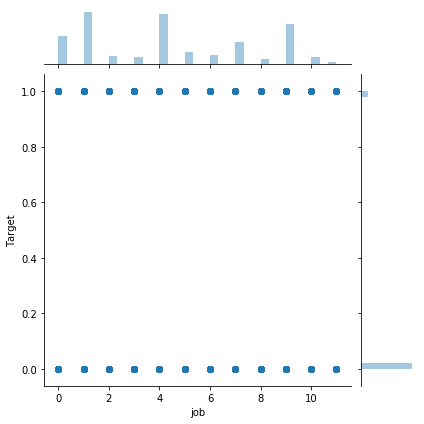

In [22]:
sns.jointplot(x=bank_df['job'],y=bank_df['Target'])

In [62]:
# The number of records with 'job' as 'Unknown' is 288. Out of which only 34 records are having target as 'yes'
print("Number of records with job as UNKNOWN : ",bank_df[bank_df['job']==11].shape[0])
print("Number of records with job as UNKNOWN and Target value as YES : ",bank_df[(bank_df['job']==11) & (bank_df['Target']==1)].shape[0])

Number of records with job as UNKNOWN :  0
Number of records with job as UNKNOWN and Target value as YES :  0


In [58]:
print("Number of records with education as UNKNOWN : ",bank_df[bank_df['education']==3].shape[0])
print("Number of records with education as UNKNOWN and Target value as YES : ",bank_df[(bank_df['education']==3) & (bank_df['Target']==1)].shape[0])

Number of records with education as UNKNOWN :  1857
Number of records with education as UNKNOWN and Target value as YES :  252


In [59]:
print("Number of records with contact as UNKNOWN : ",bank_df[bank_df['contact']==2].shape[0])
print("Number of records with contact as UNKNOWN and Target value as YES : ",bank_df[(bank_df['contact']==2) & (bank_df['Target']==1)].shape[0])

Number of records with contact as UNKNOWN :  13020
Number of records with contact as UNKNOWN and Target value as YES :  530


In [60]:
print("Number of records with poutcome as UNKNOWN : ",bank_df[bank_df['poutcome']==3].shape[0])
print("Number of records with poutcome as UNKNOWN and Target value as YES : ",bank_df[(bank_df['poutcome']==3) & (bank_df['Target']==1)].shape[0])

Number of records with poutcome as UNKNOWN :  36959
Number of records with poutcome as UNKNOWN and Target value as YES :  3386


In [63]:
#bank_df=bank_df[bank_df['job']!=11]
#bank_df=bank_df[bank_df['education']!=3]
#bank_df=bank_df[bank_df['contact']!=2]
#bank_df=bank_df[bank_df['poutcome']!=3]
#print(bank_df['Target'].value_counts())
#OUTPUT :
#0    6056
#1    1786
#Name: Target, dtype: int64

## As seen above, if we remove all the unknown values in the dataset, a huge part of set containg target as '1' is lost.
# So, it is better to leave the Unkown values as such.

In [4]:
# Taking a copy of the dataset before removing the outliers

bank_df.head()
bank_df_with_outliers=bank_df.copy()

In [5]:
def removeOutliers(column,df):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    df=df[df[column]<(q3+(1.5*iqr))]
    df=df[df[column]>(q1-(1.5*iqr))]
    return df

Number of outliers out of total records :  11297  / 45211


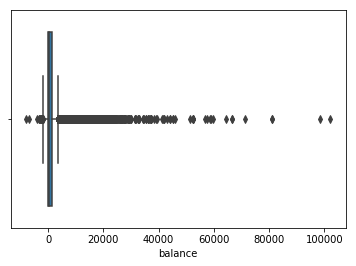

In [6]:
sns.boxplot(bank_df['balance'])
print("Number of outliers out of total records : ",bank_df[bank_df['balance']>bank_df['balance'].quantile(0.75)].shape[0]," /",bank_df.shape[0])

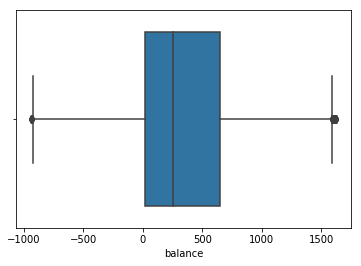

In [6]:
bank_df=removeOutliers('balance',bank_df)
bank_df=removeOutliers('balance',bank_df)
bank_df=removeOutliers('balance',bank_df)
bank_df=removeOutliers('balance',bank_df)
bank_df=removeOutliers('balance',bank_df)
bank_df=removeOutliers('balance',bank_df)
sns.boxplot(bank_df['balance'])

NUmber of outliers :  8684


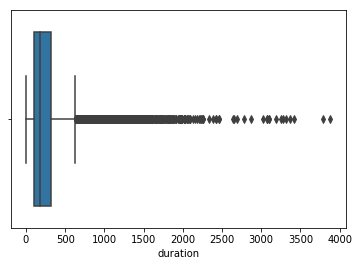

In [8]:
sns.boxplot(bank_df['duration'])
print("NUmber of outliers : ",bank_df[bank_df['duration']>bank_df['duration'].quantile(0.75)].shape[0])

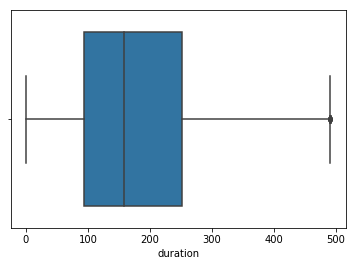

In [7]:
bank_df=removeOutliers('duration',bank_df)
bank_df=removeOutliers('duration',bank_df)
bank_df=removeOutliers('duration',bank_df)
bank_df=removeOutliers('duration',bank_df)
bank_df=removeOutliers('duration',bank_df)
sns.boxplot(bank_df['duration'])

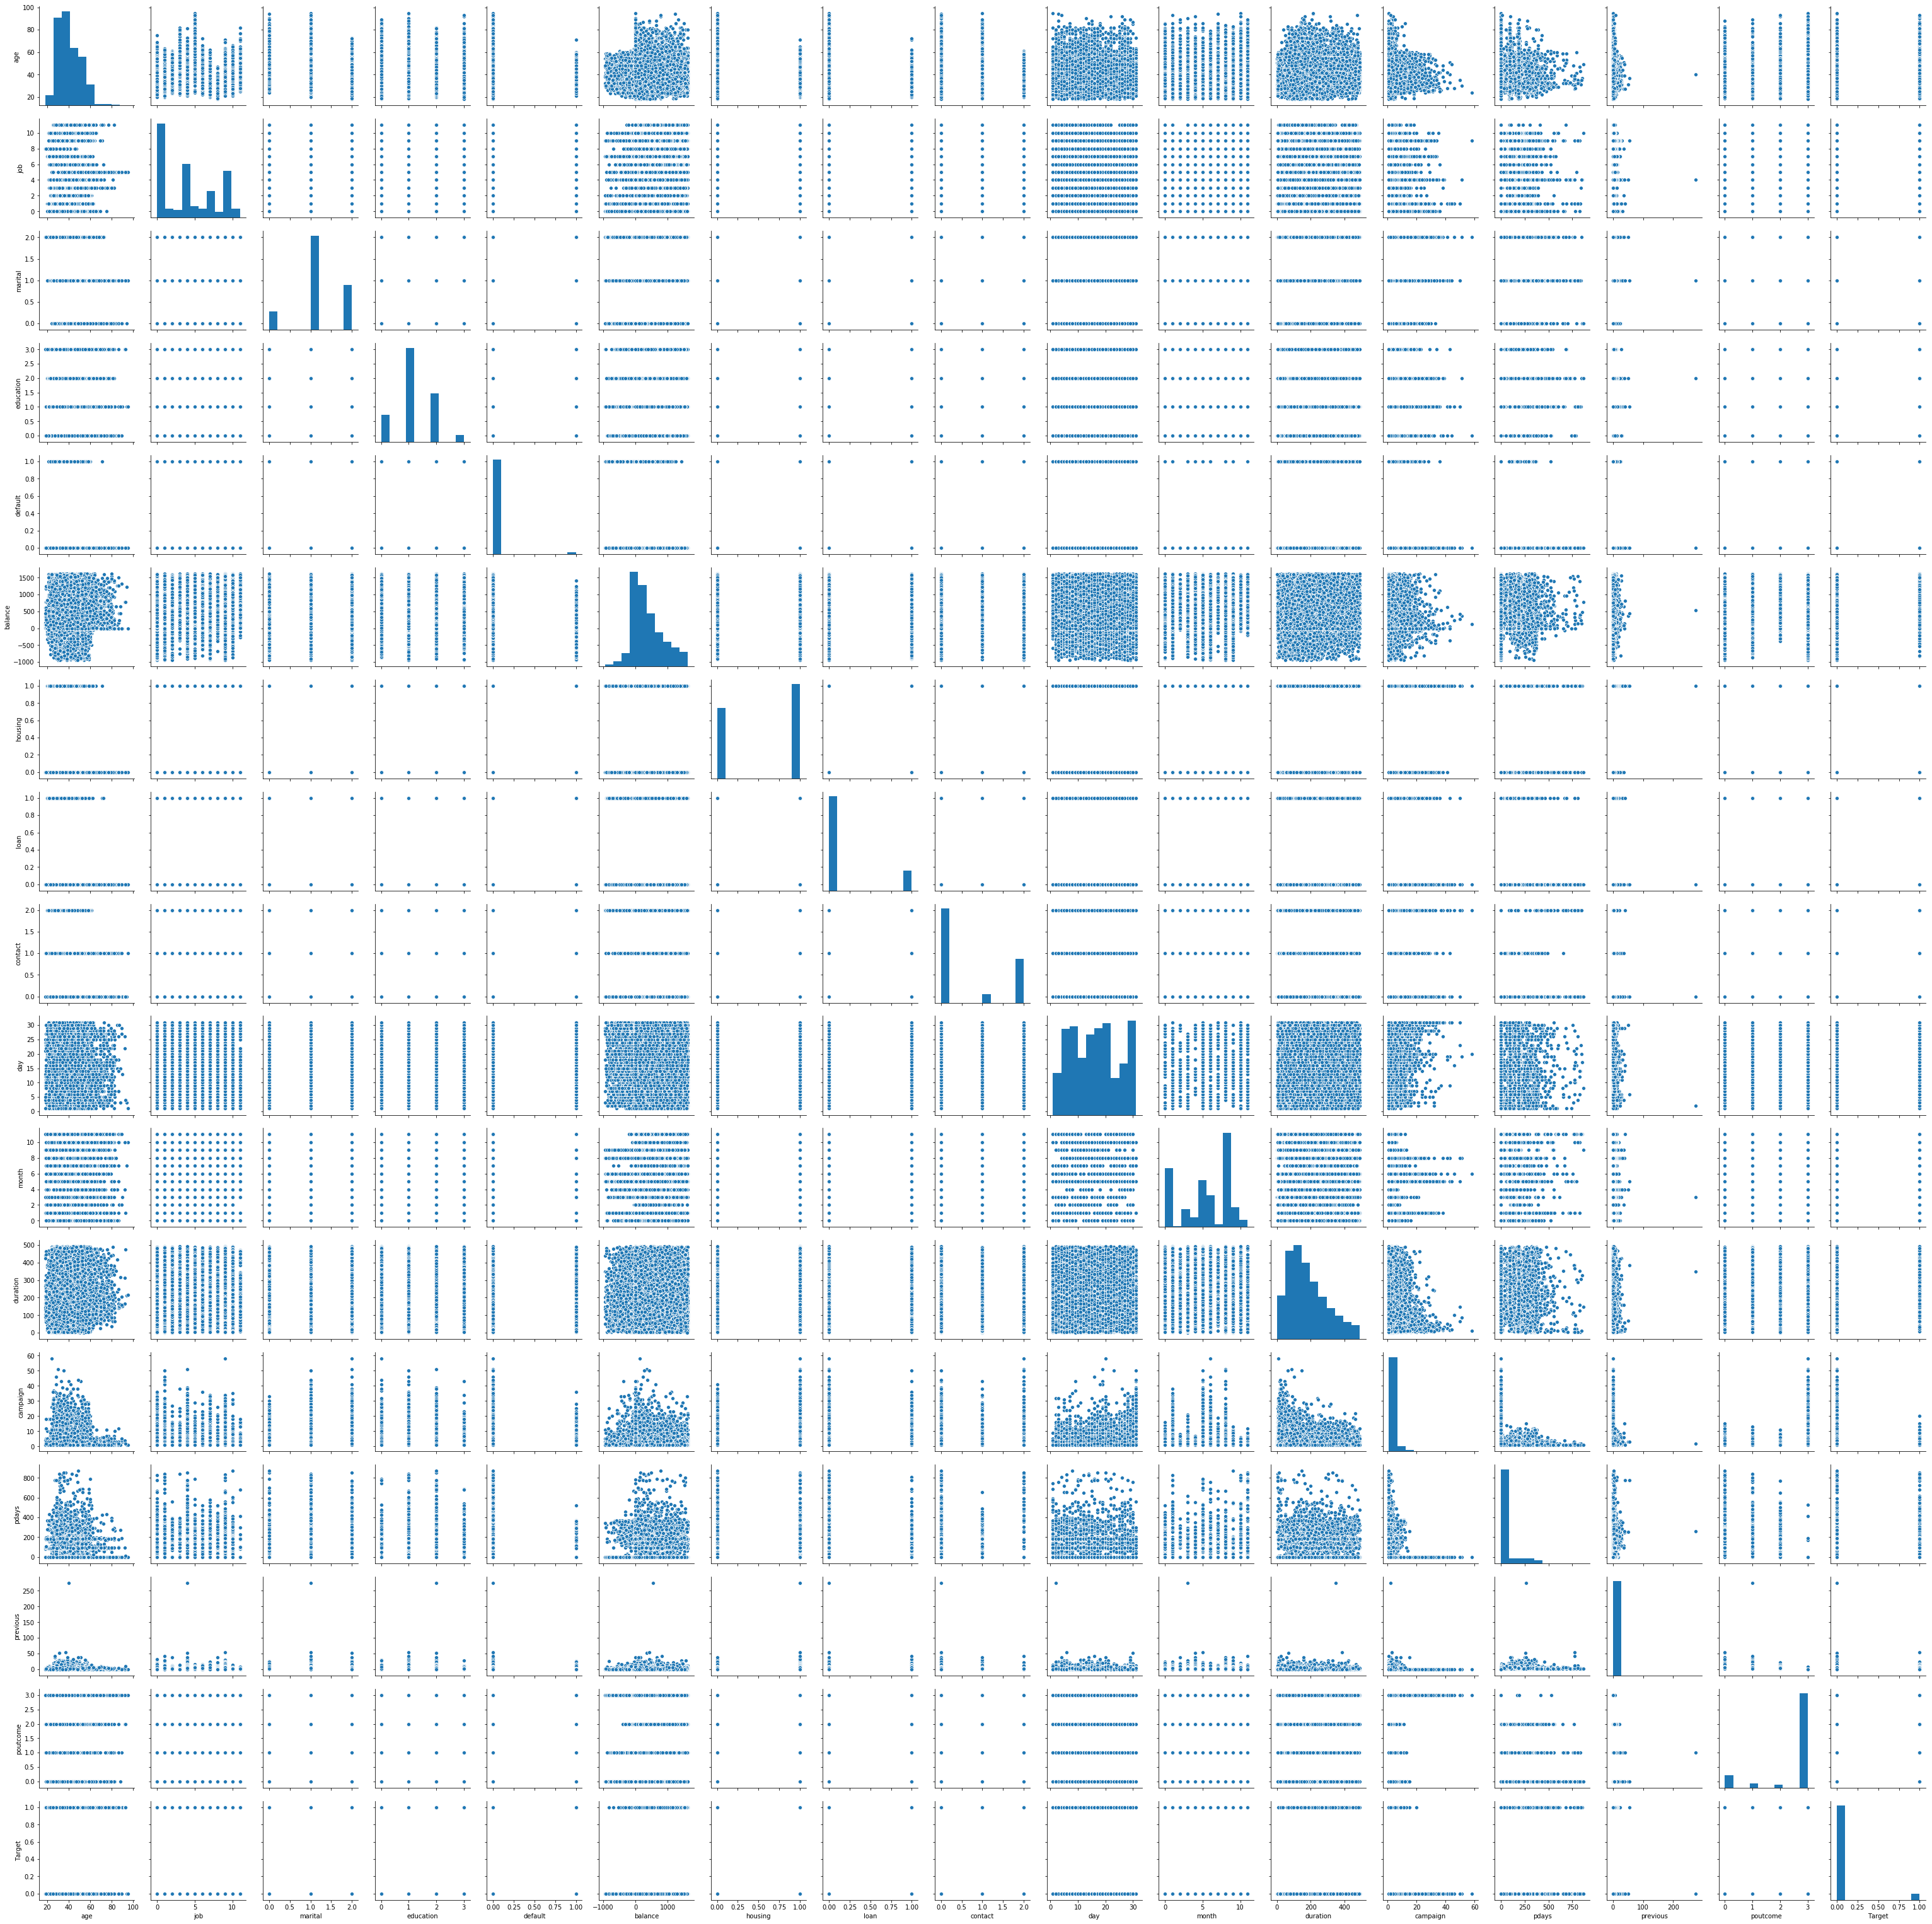

In [99]:
sns.pairplot(bank_df)

In [ ]:
# As seen from the above pairplot, the Target value is not affected by other variables significantly
# Except the Campaign variable, which on increasing 

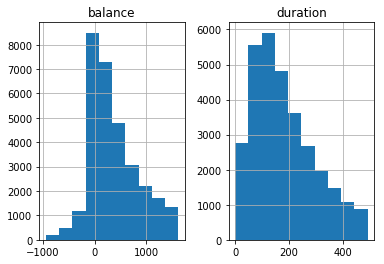

In [11]:
bank_df.hist(column=['balance','duration'])
plt.show()

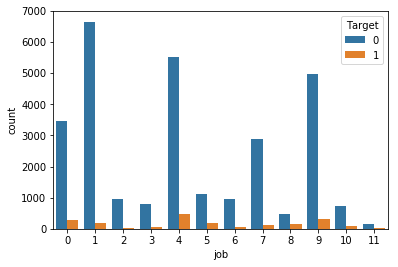

In [12]:
sns.countplot(x='job',data=bank_df,hue='Target')

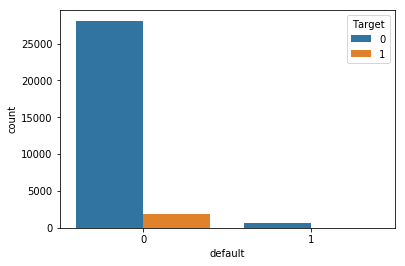

In [13]:
sns.countplot(x='default',data=bank_df,hue='Target')

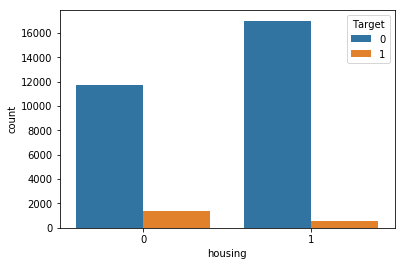

In [14]:
sns.countplot(x='housing',data=bank_df,hue='Target')

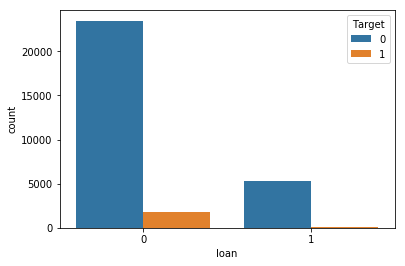

In [15]:
sns.countplot(x='loan',data=bank_df,hue='Target')

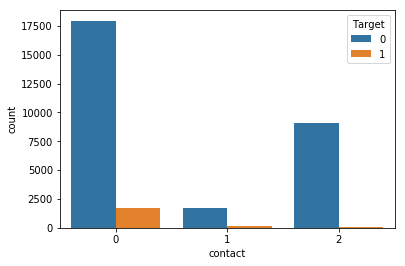

In [16]:
sns.countplot(x='contact',data=bank_df,hue='Target')

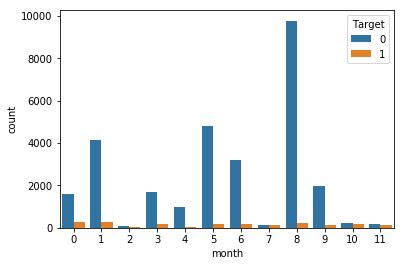

In [17]:
sns.countplot(x='month',data=bank_df,hue='Target')

In [87]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

logReg_df=bank_df.copy()
model = LogisticRegression()
y=logReg_df['Target']
logReg_df.drop(['Target'],axis=1,inplace=True)
X=logReg_df

In [88]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
model.fit(X_train,y_train)
y_predicted= model.predict(X_test)

print(model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predicted))
print("Recall Score : ",metrics.recall_score(y_test,y_predicted))
print("Precision Score : ",metrics.precision_score(y_test,y_predicted))

# The recall score for logistic regression is not GOOD

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9380223597091067
[[8595   34]
 [ 537   47]]
Recall Score :  0.08047945205479452
Precision Score :  0.5802469135802469


In [89]:
# KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import preprocessing

zScore_df=bank_df.apply(zscore)
zScore_df.head()

y=zScore_df['Target']
zScore_df.drop(['Target'],axis=1,inplace=True)
X=zScore_df
encoder=preprocessing.LabelEncoder()
encoded_y=encoder.fit_transform(y)

X_train, X_test, y_train, y_test =train_test_split(X,encoded_y,test_size=0.30,random_state=1)

Text(0, 0.5, 'Mean error')

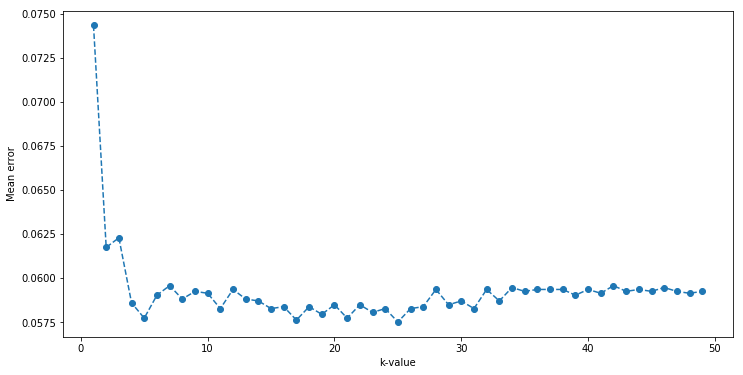

In [29]:
error=[]
for i in range(1,50):
    knn_imodel=KNeighborsClassifier(n_neighbors=i)
    knn_imodel.fit(X_train,y_train)
    y_iPredicted=knn_imodel.predict(X_test)
    error.append(np.mean(y_test != y_iPredicted))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error,marker='o', linestyle='dashed')
plt.xlabel('k-value')
plt.ylabel('Mean error')

In [90]:
# Mean Error is the lowest for K value 5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_predicted= knn_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_predicted))
print("Precision Score : ",metrics.precision_score(y_test,y_predicted))
print("Recall Score : ",metrics.recall_score(y_test,y_predicted))

# Recall score for Knn (when outliers are removed) is very less, so we cannot rely on this model

[[8543   86]
 [ 446  138]]
Accuracy Score :  0.9422555085205687
Precision Score :  0.6160714285714286
Recall Score :  0.2363013698630137


In [91]:
# Performing KNN model on data without removing outliers

zScore_outliersdf=bank_df_with_outliers.apply(zscore)

y=zScore_outliersdf['Target']
zScore_outliersdf.drop(['Target'],axis=1,inplace=True)
X=zScore_outliersdf
encoder=preprocessing.LabelEncoder()
encoded_y=encoder.fit_transform(y)

X_train, X_test, y_train, y_test =train_test_split(X,encoded_y,test_size=0.30,random_state=1)

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_predicted= knn_model.predict(X_test)

#print(knn_model.score(X_test,y_test))
print(metrics.confusion_matrix(y_test,y_predicted))
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_predicted))
print("Precision Score : ",metrics.precision_score(y_test,y_predicted))
print("Recall Score : ",metrics.recall_score(y_test,y_predicted))

# Recall score for Knn (when outliers are not removed) is also very less

[[11672   341]
 [ 1025   526]]
Accuracy Score :  0.8992922441757594
Precision Score :  0.6066897347174164
Recall Score :  0.33913604126370084


In [93]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

naiveBayes_model=GaussianNB()
naiveBayes_df=bank_df.copy()

y=naiveBayes_df['Target']
naiveBayes_df.drop(['Target'],axis=1,inplace=True)
X=naiveBayes_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
naiveBayes_model.fit(X_train,y_train)
y_predicted= naiveBayes_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))


# Compared to other models the recall score is better for Naive Bayes

[[7268 1361]
 [ 200  384]]
Accuracy Score :  0.8305655052643004
Recall Score :  0.6575342465753424


In [15]:
# SUPPORT VECTOR MACHINES
from sklearn import svm

svm_model = svm.SVC()

svc_df=bank_df.copy()

y=svc_df['Target']
svc_df.drop(['Target'],axis=1,inplace=True)
X=svc_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)
svm_model.fit(X_train,y_train)
y_predicted= svm_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))

# This model is very accurate for 0's but also very inaccurate for 1's

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[8629    0]
 [ 584    0]]
0.936611310105286


In [94]:
# DECISSION TREE
from sklearn.tree import DecisionTreeClassifier

decisionTree_model=DecisionTreeClassifier(random_state=1)
decisionTree_df=bank_df.copy()

y=decisionTree_df['Target']
decisionTree_df.drop(['Target'],axis=1,inplace=True)
X=decisionTree_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [95]:
decisionTree_model.fit(X_train,y_train)
y_predicted=decisionTree_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of single instance DecisionTree is not very impressive

[[8262  367]
 [ 341  243]]
Accuracy Score :  0.9231520677303809
Recall Score :  0.4160958904109589


In [96]:
decisionTree_model=DecisionTreeClassifier(random_state=1,max_depth=5)
decisionTree_model.fit(X_train,y_train)
y_predicted=decisionTree_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print(metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

print('Model score on test data : ',decisionTree_model.score(X_test,y_test))
print('Model score on train data : ',decisionTree_model.score(X_train,y_train))


[[8521  108]
 [ 398  186]]
0.9450776077282101
Recall Score :  0.3184931506849315
Model score on test data :  0.9450776077282101
Model score on train data :  0.9491020749976737


In [97]:
# BAGGING CLASSIFIER
from sklearn.ensemble import BaggingClassifier

dtc=DecisionTreeClassifier(random_state=1,max_depth=20)
bagging_model=BaggingClassifier(base_estimator=dtc, n_estimators=25)

bagging_df=bank_df.copy()

y=bagging_df['Target']
bagging_df.drop(['Target'],axis=1,inplace=True)
X=bagging_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [98]:
bagging_model.fit(X_train,y_train)
y_predicted=bagging_model.predict(X_test)
#decisionTree_model.score(X_test,,y_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Bagging classifier with Decision tree(25 instances) is very less

[[8497  132]
 [ 353  231]]
Accuracy Score :  0.9473569955497666
Recall Score :  0.3955479452054795


In [99]:
# ADABOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier

dtc=DecisionTreeClassifier(random_state=1)
adaBoost_model=AdaBoostClassifier(base_estimator=dtc, n_estimators=25)

adaBoost_df=bank_df.copy()

y=adaBoost_df['Target']
adaBoost_df.drop(['Target'],axis=1,inplace=True)
X=adaBoost_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [100]:
adaBoost_model.fit(X_train,y_train)
y_predicted=adaBoost_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Adaboosting classifier with Decision tree is very less

[[8249  380]
 [ 341  243]]
Accuracy Score :  0.9217410181265603
Recall Score :  0.4160958904109589


In [60]:
# GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier


gradBoost_model=GradientBoostingClassifier(n_estimators=25)

gradBoost_df=bank_df.copy()

y=gradBoost_df['Target']
gradBoost_df.drop(['Target'],axis=1,inplace=True)
X=gradBoost_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [61]:
gradBoost_model.fit(X_train,y_train)
y_predicted=gradBoost_model.predict(X_test)
#decisionTree_model.score(X_test,,y_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Gradient boosting classifier with Decision tree is very less

[[8601   28]
 [ 481  103]]
0.9447519808965592
Recall Score :  0.17636986301369864


In [70]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier


randBoost_model=RandomForestClassifier(n_estimators=25,random_state=1,max_depth=20)

randBoost_df=bank_df.copy()

y=randBoost_df['Target']
randBoost_df.drop(['Target'],axis=1,inplace=True)
X=randBoost_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

In [101]:
randBoost_model.fit(X_train,y_train)
y_predicted=randBoost_model.predict(X_test)
#decisionTree_model.score(X_test,,y_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Random Forest classifier with Decision tree is very less

[[8532   97]
 [ 371  213]]
Accuracy Score :  0.9492022142624552
Recall Score :  0.3647260273972603


In [103]:
# BAGGING WITH NAIVE BAYES
from sklearn.ensemble import BaggingClassifier

naiveBayes_model=GaussianNB()
bagging_model=BaggingClassifier(base_estimator=naiveBayes_model, n_estimators=50)

bagging_df=bank_df.copy()

y=bagging_df['Target']
bagging_df.drop(['Target'],axis=1,inplace=True)
X=bagging_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

bagging_model.fit(X_train,y_train)
y_predicted=bagging_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Bagging classifier with Naive Bayes is better

[[7241 1388]
 [ 195  389]]
Accuracy Score :  0.8281775751655269
Recall Score :  0.666095890410959


In [102]:
# ADABOOST CLASSIFIER WITH NAIVE BAYES
from sklearn.ensemble import AdaBoostClassifier

naiveBayes_model=GaussianNB()
adaBoost_model=AdaBoostClassifier(base_estimator=naiveBayes_model, n_estimators=50,random_state=1)

adaBoost_df=bank_df.copy()

y=adaBoost_df['Target']
adaBoost_df.drop(['Target'],axis=1,inplace=True)
X=adaBoost_df

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,random_state=1)

adaBoost_model.fit(X_train,y_train)
y_predicted=adaBoost_model.predict(X_test)

print(metrics.confusion_matrix(y_test,y_predicted))
print('Accuracy Score : ',metrics.accuracy_score(y_test,y_predicted))
print('Recall Score : ',metrics.recall_score(y_test,y_predicted))

# Recall score of Adaboost classifier with Naive Bayes model is the highest amongst these models.
# But the number of wrong predictions for 0 is also high.

[[5106 3523]
 [ 176  408]]
Accuracy Score :  0.5985021165744058
Recall Score :  0.6986301369863014


In [ ]:
# CONCLUSION

# The accuracy and recall score of both Naive Bayes classifier and Bagging classifier with Naive Bayes are the same
# And better than other models
# Accuracy Score :  0.8305655052643004
# Recall Score :  0.6575342465753424
# These models can be tuned to give better results